In [1]:
import pandas as pd
import globals as gl
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.close('all')
plt.style.use('default')

experiment = 'efc3'

Base directory found: /Users/mnlmrc/Library/CloudStorage/GoogleDrive-mnlmrc@unife.it/My Drive/UWO/ExtFlexChord


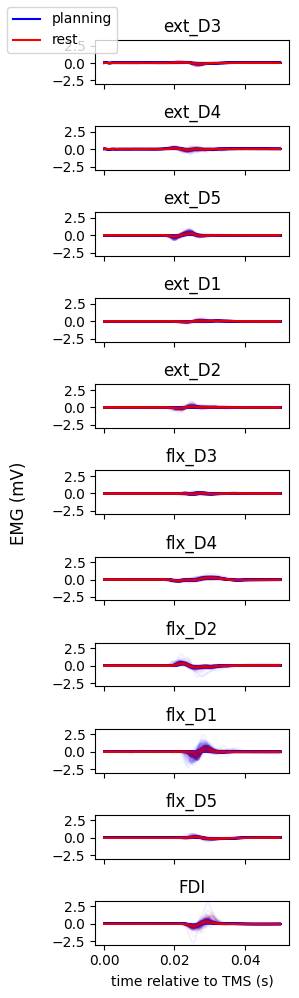

In [2]:
meps = np.load(os.path.join(gl.baseDir, experiment, 'emg', 'day1', 'subj100', 'mep_segmented.npy'))[:, :11, :]
mepAmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'emg', 'day1', 'subj100', 'mepAmp.tsv'), sep='\t')

channels = mepAmp.columns[:11].to_list()

fig, axs = plt.subplots(meps.shape[1], sharex=True, sharey=True, figsize=(3, 10))

tAx = np.linspace(0, .05, meps.shape[-1])

for c, ch in enumerate(channels):

    axs[c].plot(tAx, meps[mepAmp['condition']=='planning', c].T, color='b', alpha=.05)
    axs[c].plot(tAx, meps[mepAmp['condition']=='rest', c].T, color='r', alpha=.05)

    axs[c].set_title(ch)

axs[0].plot(np.nan, color='b', label='planning')
axs[0].plot(np.nan, color='r', label='rest')

fig.legend(ncol=1, loc='upper left')

fig.supylabel('EMG (mV)')
axs[-1].set_xlabel('time relative to TMS (s)')

fig.tight_layout()


# **Planning vs. rest**

Text(0, 0.5, 'norm of MEP amplitude across electrodes (mV)')

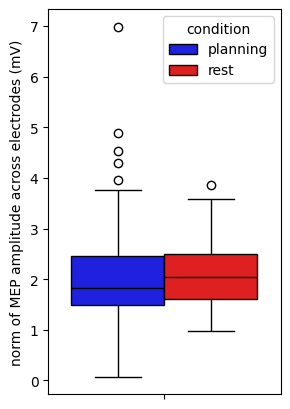

In [3]:
mepAmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'emg', 'day1', 'subj100', 'mepAmp.tsv'), sep='\t')

mepAmp['norm'] = np.linalg.norm(mepAmp.iloc[:, :11].to_numpy(), axis=1)

fig, axs = plt.subplots(figsize=(3, 5))

sns.boxplot(mepAmp, ax=axs, hue='condition', y='norm', palette=['blue', 'red'],  linewidth=1, linecolor='k', )

axs.set_ylabel('norm of MEP amplitude across electrodes (mV)')

Text(0, 0.5, 'norm of MEP amplitude across electrodes (mV)')

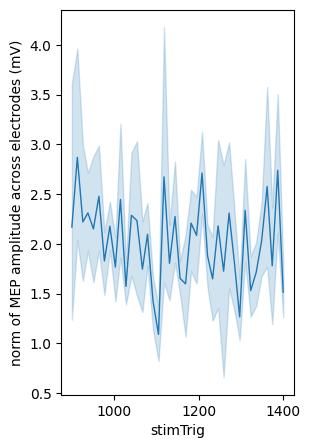

In [4]:
mepAmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'emg', 'day1', 'subj100', 'mepAmp.tsv'), sep='\t')

mepAmp['norm'] = np.linalg.norm(mepAmp.iloc[:, :11].to_numpy(), axis=1)

fig, axs = plt.subplots(figsize=(3, 5))

sns.lineplot(mepAmp[mepAmp['condition']=='planning'], ax=axs, x='stimTrig', y='norm', linewidth=1, )

axs.set_ylabel('norm of MEP amplitude across electrodes (mV)')

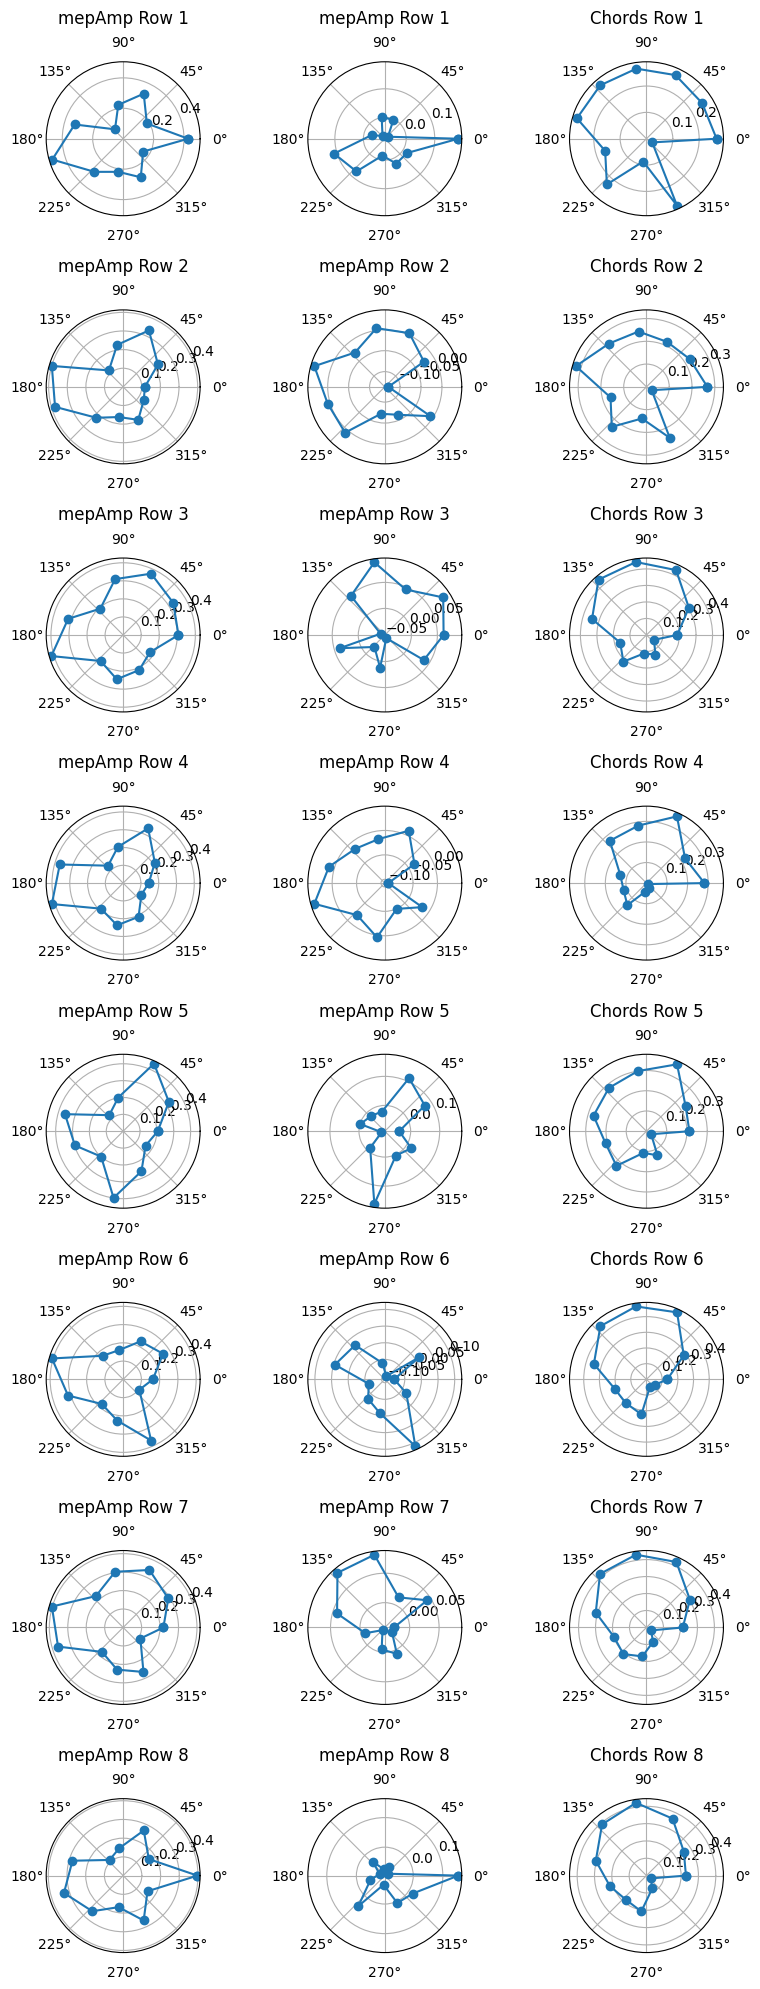

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scaler = MinMaxScaler()

mepAmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'emg', 'day1', 'subj100', 'mepAmp.tsv'), sep='\t')
mepAmp = mepAmp[mepAmp['condition']=='planning']
mepAmp.iloc[:, :11] = scaler.fit_transform(mepAmp.iloc[:, :11])
mepAmp_mean = mepAmp.iloc[:, :11].to_numpy().mean(axis=0)
mepAmp_demean = mepAmp.copy()
mepAmp_demean.iloc[:, :11] = mepAmp_demean.iloc[:, :11] - mepAmp_mean
mepAmp = mepAmp.groupby(['chordID']).mean(numeric_only=True).reset_index().drop(['chordID', 'stimTrig', 'BN'], axis=1).to_numpy()

mepAmp_demean = mepAmp_demean.groupby(['chordID']).mean(numeric_only=True).reset_index().drop(['chordID', 'stimTrig', 'BN'], axis=1).to_numpy()

Chords = pd.read_csv(os.path.join(gl.baseDir, experiment, 'emg', 'day1', 'subj100', 'Chords.tsv'), sep='\t')
Chords.iloc[:, :11] = scaler.fit_transform(Chords.iloc[:, :11])
Chords = Chords.groupby(['chordID']).mean(numeric_only=True).reset_index().drop(['chordID',  'BN'], axis=1).to_numpy()

# Create figure with subplots arranged as 8 rows and 2 columns
fig, axs = plt.subplots(8, 3, subplot_kw={'projection': 'polar'}, figsize=(8, 20))

# Generate theta values for polar plot (full circle divided by 11 data points)
theta = np.linspace(0, 2 * np.pi, 11, endpoint=False)

# Plot each row of mepAmp and Chords
for i in range(8):
    # Plot mepAmp
    axs[i, 0].plot(np.append(theta, theta[0]), np.append(mepAmp[i], mepAmp[i][0]), marker='o')
    axs[i, 0].set_title(f'mepAmp Row {i + 1}', va='bottom')

    axs[i, 1].plot(np.append(theta, theta[0]), np.append(mepAmp_demean[i], mepAmp_demean[i][0]), marker='o')
    axs[i, 1].set_title(f'mepAmp Row {i + 1}', va='bottom')

    # Plot Chords
    axs[i, 2].plot(np.append(theta, theta[0]), np.append(Chords[i], Chords[i][0]), marker='o')
    axs[i, 2].set_title(f'Chords Row {i + 1}', va='bottom')

plt.tight_layout()
plt.show()


# mepAmp = mepAmp - mepAmp.mean(axis=1, keepdims=True)
# Chords = Chords - Chords.mean(axis=1, keepdims=True)
#
# Cov = np.dot(mepAmp, Chords.T)
#
# Std = np.sqrt(np.sum(mepAmp**2, axis=1)).reshape(-1, 1) * np.sqrt(np.sum(Chords**2, axis=1)).reshape(1, -1)
#
# corr = Cov / Std



/Users/mnlmrc/Documents/GitHub/extension-flexion-chords/venv/lib/python3.12/site-packages/numpy/_core/numeric.py:457: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


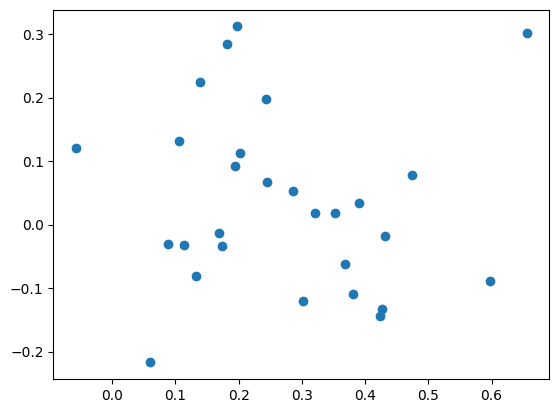

In [2]:
from rsa import calc_rdm_unbalanced
import rsatoolbox

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scaler = MinMaxScaler()

# MEPs
mepAmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'emg', 'day1', 'subj100', 'mepAmp.tsv'), sep='\t')
mepAmp = mepAmp[mepAmp['condition']=='planning']

mepAmp.iloc[:, :11] = scaler.fit_transform(mepAmp.iloc[:, :11])

cond_vec = mepAmp['chordID'].to_numpy()
run_vec = mepAmp['BN'].to_numpy()

mepAmp = mepAmp.drop(['chordID', 'stimTrig', 'BN', 'condition'], axis=1)

channels = mepAmp.columns # channels

mepAmp = mepAmp.to_numpy() # data

rdmMep = calc_rdm_unbalanced(mepAmp, channels, cond_vec, run_vec)

# Chord

Chords = pd.read_csv(os.path.join(gl.baseDir, experiment, 'emg', 'day1', 'subj100', 'Chords.tsv'), sep='\t')
# Chords.iloc[:, :11] = scaler.fit_transform(Chords.iloc[:, :11])
cond_vec = Chords['chordID'].to_numpy()
run_vec = Chords['BN'].to_numpy()

Chords = Chords.drop(['chordID',  'BN', 'participant_id', 'chord'], axis=1)

channels = Chords.columns # channels

Chords = Chords.to_numpy()

rdmChords = calc_rdm_unbalanced(Chords, channels, cond_vec, run_vec)

fig, axs = plt.subplots()

axs.scatter(rdmMep.dissimilarities, rdmChords.dissimilarities)